> Der Kernel dieses Notebooks sollte und kann ohne eine eigene Twitter-API nicht neu gestartet werden.

# Twitter Mining


Twitter Mining kann neben Python natürlich auch in R betrieben werden. Dazu benötigen wir das Package `twitteR`. Mithilfe von Anaconda ist dieses Packages ganz leicht zu installieren. Dazu öffnen wir einfach **RStudio** und geben folgenden Befehl in die Konsole ein: `install.packages('twitteR')`. Nun haben wir das Package installiert und können es in unserem Notebook verwenden. 

Als nächstes laden wir die Bibliothek.

In [2]:
library(twitteR)

Um unsere Twitter-Api zu authentifizieren brauchen wir wiederum die `ROAuth` Bibliothek. Diese müssen wir auf die gleiche Weise installieren, wie bei `twitteR`. 

Dann kann auch diese Bibliothek geladen werden.

In [5]:
library(ROAuth)

Jetzt können wir unsere Authentifzierung durchführen.

In [11]:
CONSUMER_KEY = 'v6hhWSLggZvhqFZr6fFtbO7t1'
CONSUMER_SECRET = 'pNLQCcbUDIsPXfw7TWzlSCJQ1kcswk4SW1lZOWL8Yiqe6jr8qU'
OAUTH_TOKEN = '168648836-atEdUT3jeyWtCq1xQL2JhsrQQTCUEcmfxEamdsZ4' 
OAUTH_TOKEN_SECRET = 'ASJ31Q9vW1eKpZxjlyz364pqBtoFQItimexlvF5V7wF22'

setup_twitter_oauth(CONSUMER_KEY, CONSUMER_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

[1] "Using direct authentication"


Nun können wir nach Tweets suchen. Dazu benötigen wir die `searchTwitter()` Funktion.

In [19]:
twd = searchTwitter("#TheWalkingDead", n=100)

In [20]:
head(twd)

[[1]]
[1] "fallenangel1578: RT @AlisonHabbo_: sorry cant go go school tomorrow, theres been a death in my family #RipCarl #TheWalkingDead https://t.co/IeUW7eBZg3"

[[2]]
[1] "kinguly_: RT @katchababe: Only 4 characters left from Season 1. Dunno what to feel. #TheWalkingDead https://t.co/hSgQAR3Ozj"

[[3]]
[1] "MuskyPenguin: Just caught #TheWalkingDead mid season finale at 6am on this here Monday morning I'm all kinds of messed up RN <ed><U+00A0><U+00BD><ed><U+00B8><U+00A2> #NoSpoilers"

[[4]]
[1] "kevmcmillan86: RT @officialgreview: New Cinematic Trailer for OVERKILLs The Walking Dead https://t.co/Ar07CKbybR\n#thewalkingdead #overkill #starbreezes"

[[5]]
[1] "MashaiL_suhaim: RT @Moe_Dogg89: What!!! What!!! What!!!!! What!!!!!! No!!!! #TheWalkingDead https://t.co/9odo6Ne2El"

[[6]]
[1] "ralfiee_: RT @GalarzaJuanj: Just finished that mid season finale.....WOW #thewalkingdead https://t.co/qGCNjUngxp"


Wir benutzen die `strip_retweets` Funktion, um die offizielle API-Retweetfunktion aus unseren Daten zu entfernen.

In [21]:
head(strip_retweets(twd,strip_manual=TRUE,strip_mt=TRUE)) 

[[1]]
[1] "MuskyPenguin: Just caught #TheWalkingDead mid season finale at 6am on this here Monday morning I'm all kinds of messed up RN <ed><U+00A0><U+00BD><ed><U+00B8><U+00A2> #NoSpoilers"

[[2]]
[1] "nadhrahrdzn: Scott Gimple did Chandler so dirty Im fuming! #TheWalkingDead https://t.co/ZSHLclPQBX"

[[3]]
[1] "Mousefan98: @KRRowe @ithrah69 Needless to say after last night I know have one very upset daughter this morning! #TheWalkingDead"

[[4]]
[1] "FormulaTV: RECAP | La destrucción y la incertidumbre se convierten en protagonistas del 8x08 de #TheWalkingDead https://t.co/Na2YeXNS9E"

[[5]]
[1] "Sergivs8: @foxtves Jajaja gracias a ustedes! Carmina Forever! #Deadcimo a ver si este capítulo de #TheWalkingDead es un poco https://t.co/h6D8e2ScF3"

[[6]]
[1] "neojedigoddess: #TheWalkingDead\n\nWhy is everyone so shocked? Chandler talked about wanting to go to college, he cut his hair for a https://t.co/91A3AOahnT"


Das schöne an R ist, dass die Tweets gleich in einer schönen Struktur ausgegeben werden. Man benötigt hier als nicht, wie in Python das Json-Format. Was uns auch auffällt, ist, dass *R* keine Metadaten zu unseren Tweets ausgibt.

Unsere Tweets können wir nun auch in einem DataFrame speichern.

In [23]:
df <- twListToDF(twd)

In [24]:
head(df)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
"RT @AlisonHabbo_: sorry cant go go school tomorrow, theres been a death in my family #RipCarl #TheWalkingDead https://t.co/IeUW7eBZg3",FALSE,0,NA,2017-12-11 11:23:06,FALSE,NA,940180133117390849,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",fallenangel1578,14,TRUE,FALSE,NA,NA
RT @katchababe: Only 4 characters left from Season 1. Dunno what to feel. #TheWalkingDead https://t.co/hSgQAR3Ozj,FALSE,0,NA,2017-12-11 11:23:05,FALSE,NA,940180130055385088,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",kinguly_,6,TRUE,FALSE,NA,NA
Just caught #TheWalkingDead mid season finale at 6am on this here Monday morning I'm all kinds of messed up RN <ed><U+00A0><U+00BD><ed><U+00B8><U+00A2> #NoSpoilers,FALSE,0,NA,2017-12-11 11:23:04,FALSE,NA,940180126087688192,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",MuskyPenguin,0,FALSE,FALSE,NA,NA
RT @officialgreview: New Cinematic Trailer for ‘OVERKILL’s The Walking Dead’ https://t.co/Ar07CKbybR #thewalkingdead #overkill #starbreezes…,FALSE,0,NA,2017-12-11 11:23:01,FALSE,NA,940180113336995840,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",kevmcmillan86,1,TRUE,FALSE,NA,NA
RT @Moe_Dogg89: What!!! What!!! What!!!!! What!!!!!! No!!!! #TheWalkingDead https://t.co/9odo6Ne2El,FALSE,0,NA,2017-12-11 11:23:00,FALSE,NA,940180111747436544,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",MashaiL_suhaim,922,TRUE,FALSE,NA,NA
RT @GalarzaJuanj: Just finished that mid season finale.....WOW #thewalkingdead https://t.co/qGCNjUngxp,FALSE,0,NA,2017-12-11 11:22:59,FALSE,NA,940180106231681024,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",ralfiee_,1,TRUE,FALSE,NA,NA


Wie wir sehen können, werden bei unserem Dataframe die Metadaten zu unseren Tweets mitausgegeben. Wir können mit diesen Metdadaten jetzt ein wenig spielen. 

Beispielsweise können wir abfragen, ob es Tweets in unserem Datensatz haben, die mehr als 900 Retweets haben:

In [35]:
any(df$retweetCount > 900)

[1] TRUE

Da dies der Fall ist, wollen wir natürlich wissen, wie viele Retweets, der am meist geteilte Tweet in unserem Datensatz hat:

In [36]:
max(df$retweetCount)

[1] 922

Welche Nummer hat der Tweet mit den meisten Retweets:

In [39]:
which(df$retweetCount == '922')

[1] 5

Welche Tweets wurden geteilt und welche nicht:

In [34]:
which(df$isRetweet == 'TRUE')

which(df$isRetweet == 'FALSE')

[1]  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 24 29 30 34 36 37
[26] 38 39 41 42 43 49 50 51 52 53 54 55 56 57 58 60 62 63 64 67 68 70 71 72 74
[51] 75 76 77 78 79 82 84 85 86 87 88 90 93 95 96 98 99

[1]   3  13  18  23  25  26  27  28  31  32  33  35  40  44  45  46  47  48  59
[20]  61  65  66  69  73  80  81  83  89  91  92  94  97 100

Dies können wir mithilfe von ggplot2 auch schön in einer Graphik anzeigen lassen:

In [43]:
library(ggplot2)

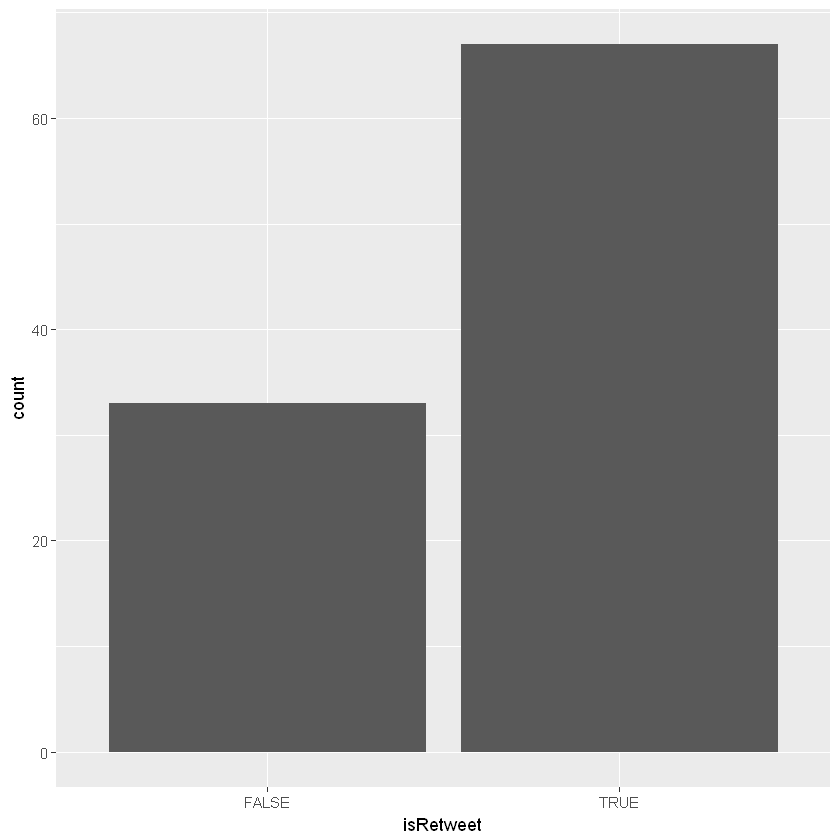

In [45]:
ggplot(df, aes(isRetweet)) + 
  geom_bar()

In unserem Datensatz gibt es also rund doppelt soviele Tweets, die geteilt wurde, wie nicht geteilte. Daraus lässt sich schließen, dass die The Walking Dead Community sehr aktiv auf Twitter ist.

## Word Clouds


Ein schöner Aspekt, den ich in R gefunden habe, ist das Erstellen von Word Clouds. Dies macht bei der Analyse von Tweets Sinn, da sich bei Twitter alles um Tweets mit Schlagwörtern dreht. Man hat nunmal nur maximal 280 Zeichen, um seine Nachricht an die anderen User rüber zu kriegen. Da sollte darauf geachtet werden, sich kurz und prägnant zu halten. 

Um eine Word Cloud anschaulich darzustellen, habe ich beschlossen, die Usertimeline von Donald Trump zu benutzen. Er ist ein sehr aktiver Twitterer und seine Tweets sind sehr polarisierend. Deshalb ist es interesstant zu sehen, welche Wörter er hüfig benutzt.

In [108]:
dtrump <- userTimeline('realdonaldtrump', n=3000)

In [82]:
head(dtrump)

[[1]]
[1] "realDonaldTrump: Very little discussion of all the purposely false and defamatory stories put out this week by the Fake News Media. https://t.co/R8tTxg9AvK"

[[2]]
[1] "realDonaldTrump: Getting closer and closer on the Tax Cut Bill. Shaping up even better than projected. House and Senate working very https://t.co/fKLVfqSmsK"

[[3]]
[1] "realDonaldTrump: Things are going really well for our economy, a subject the Fake News spends as little time as possible discussing! https://t.co/hZfaovKX9L"

[[4]]
[1] "realDonaldTrump: No American should be separated from their loved ones because of preventable crime committed by those illegally in https://t.co/leuQTYO8zk"

[[5]]
[1] "realDonaldTrump: Great Army - Navy Game. Army wins 14 to 13 and brings home the COMMANDER-IN-CHIEFS TROPHY! Congratulations!"

[[6]]
[1] "realDonaldTrump: .@daveweigel of the Washington Post just admitted that his picture was a FAKE (fraud?) showing an almost empty aren https://t.co/wERMFP0Wcp"


In [109]:
library(wordcloud)
library(RColorBrewer)

#Tweet-Text extrahieren
tweet.text<-sapply(dtrump, function(x) x$getText())

In [113]:
tryTolower = function(x)
{
# create missing value
# this is where the returned value will be
y = NA
# tryCatch error
try_error = tryCatch(tolower(x), error = function(e) e)
# kein Fehler:
if (!inherits(try_error, "error"))
y = tolower(x)
return(y)
}
tweet.text<-sapply(tweet.text, function(x) tryTolower(x))
 
## Wortkorpus erstellen
tweet.corpus<-Corpus(VectorSource(enc2utf8(tweet.text)))

## URLs löschen
removeURL <- function(x) gsub("http[^[:space:]]*", "", x)
tweet.corpus <- tm_map(tweet.corpus, content_transformer(removeURL))
    
    
# Zahlen, Satzzeichen und Stopwörter löschen und alles in Kleinbuchstaben
tdm = TermDocumentMatrix(tweet.corpus, control = list(removePunctuation = TRUE, stopwords = TRUE, removeNumbers = TRUE, tolower = TRUE))
 
#Worthäufigkeiten ermitteln
# Definition von tdm als Matrix
m = as.matrix(tdm)
# Worthäufigkeit in absteigender Reihenfolge
word_freqs = sort(rowSums(m), decreasing=TRUE)
# Dataframe erzeugen
dm = data.frame(word=names(word_freqs), freq=word_freqs)

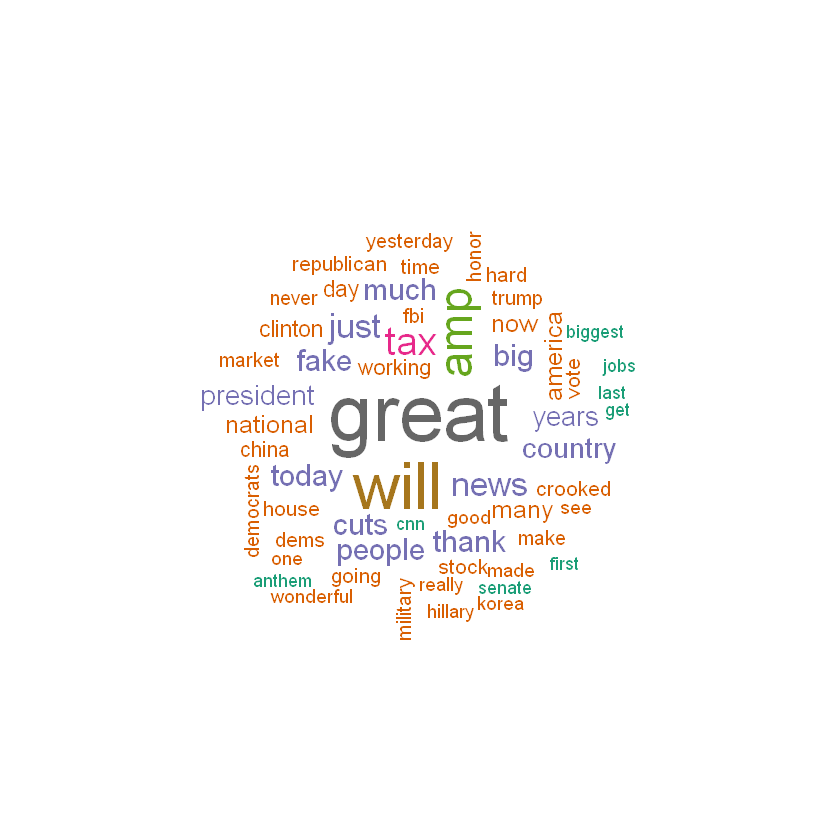

In [114]:
wordcloud(dm$word, dm$freq, random.order=FALSE, colors=brewer.pal(8, "Dark2"), min.freq=10,max.words=100)

Wie wir nun sehen können, ist das am häufigsten getweetete Wort von Donald Trump *great*, ganz nach dem Motto *Make Amerika great again*. Ansonsten finden wir noch politische Begriffe, wie *tax*, *military*, *hillary* oder auch *clinton*. Auch *korea* findet seinen verdienten Platz in der Cloud. 



## Fazit

Auch in R lässt sich Twitter Mining betreiben. Dabei kann R ähnliche Abfragen wie Python. Letzten Endes ist es nur eine Frage des eigenen Beliebens, mit welcher Bibliothek man arbeiten möchte.

# Quellen

https://cran.r-project.org/web/packages/twitteR/twitteR.pdf

http://geoffjentry.hexdump.org/twitteR.pdf

http://www.rdatamining.com/docs/twitter-analysis-with-r

http://statistics.ohlsen-web.de/twitter-mining-teil2/